In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
!pip install lime
import lime
from lime import lime_tabular
import statistics as sts
from scipy import stats
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
import time
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import missingno as msno
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d06d21921ebfdd4efc64f1550fad0a6a10fe3e0f4e6ad76ae9d861644090bd4c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research/hepatitis.csv',index_col='age')

In [ ]:
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live


In [ ]:
df_1 = df.sort_index(ascending=True)
df_1

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,,,,,,,,,,,,,,,,,,,
7,female,True,False,False,False,False,True,True,True,False,False,False,0.7,256.0,25.0,4.2,NaN,True,live
20,male,False,False,True,True,True,False,True,True,True,False,False,2.3,150.0,68.0,3.9,NaN,False,live
20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live
20,female,False,False,True,True,True,True,False,False,True,True,False,1.0,160.0,118.0,2.9,23.0,True,live
22,female,True,False,False,False,False,True,False,False,False,False,False,0.7,NaN,24.0,NaN,NaN,True,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,male,False,False,True,True,False,True,False,NaN,NaN,NaN,NaN,1.5,179.0,69.0,2.9,NaN,False,live
69,male,True,False,True,False,False,True,False,False,False,False,False,3.2,119.0,136.0,NaN,NaN,True,live
70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die


In [ ]:
df_1.reset_index(inplace=True)
df_1

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,7,female,True,False,False,False,False,True,True,True,False,False,False,0.7,256.0,25.0,4.2,NaN,True,live
1,20,male,False,False,True,True,True,False,True,True,True,False,False,2.3,150.0,68.0,3.9,NaN,False,live
2,20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live
3,20,female,False,False,True,True,True,True,False,False,True,True,False,1.0,160.0,118.0,2.9,23.0,True,live
4,22,female,True,False,False,False,False,True,False,False,False,False,False,0.7,NaN,24.0,NaN,NaN,True,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,67,male,False,False,True,True,False,True,False,NaN,NaN,NaN,NaN,1.5,179.0,69.0,2.9,NaN,False,live
151,69,male,True,False,True,False,False,True,False,False,False,False,False,3.2,119.0,136.0,NaN,NaN,True,live
152,70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die
153,72,female,True,True,True,False,False,True,True,False,False,False,False,1.0,115.0,52.0,3.4,50.0,True,live


In [ ]:
non_null_prcntge = (pd.notnull(df_1).sum()/155)*100
non_null_prcntge

age                100.000000
sex                100.000000
steroid             99.354839
antivirals         100.000000
fatigue             99.354839
malaise             99.354839
anorexia            99.354839
liver_big           93.548387
liver_firm          92.903226
spleen_palpable     96.774194
spiders             96.774194
ascites             96.774194
varices             96.774194
bilirubin           96.129032
alk_phosphate       81.290323
sgot                97.419355
albumin             89.677419
protime             56.774194
histology          100.000000
class              100.000000
dtype: float64

In [ ]:
# converting to numerical
df_1.sex[df_1.sex == "female"] = 0
df_1.sex[df_1.sex == "male"] = 1
df_1['class'][df_1['class'] == "die"] = 0
df_1['class'][df_1['class'] == "live"] = 1

for i in df_1:
  df_1[i][df_1[i] == False] = 0
  df_1[i][df_1[i] == True] = 1

<ipython-input-8-fa4a16fd91df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sex[df_1.sex == "female"] = 0
<ipython-input-8-fa4a16fd91df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sex[df_1.sex == "male"] = 1
<ipython-input-8-fa4a16fd91df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['class'][df_1['class'] == "die"] = 0
<ipython-input-8-fa4a16fd91df>:5: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['age'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['bilirubin'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['alk_phosphate'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['sgot'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['albumin'])

In [ ]:
# # Box Plot
# import seaborn as sns
# sns.boxplot(x=df_1['protime'])

In [ ]:
# def box_outliers(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
#     series = series[mask]
#     return series

In [ ]:
# print('number of lives(age): ', sum(df_1.iloc[box_outliers(df_1['age'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(age): ', sum(df_1.iloc[box_outliers(df_1['age'].sort_values(ascending=True)).index.values]['class']==0),'\n')

# print('number of lives(albumin): ', sum(df_1.iloc[box_outliers(df_1['albumin'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(albumin): ', sum(df_1.iloc[box_outliers(df_1['albumin'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(sgot): ', sum(df_1.iloc[box_outliers(df_1['sgot'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(sgot): ', sum(df_1.iloc[box_outliers(df_1['sgot'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(alk_phosphate): ', sum(df_1.iloc[box_outliers(df_1['alk_phosphate'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(alk_phosphate): ', sum(df_1.iloc[box_outliers(df_1['alk_phosphate'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(protime): ', sum(df_1.iloc[box_outliers(df_1['protime'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(protime): ', sum(df_1.iloc[box_outliers(df_1['protime'].sort_values(ascending=True)).index.values]['class']==0), '\n')

# print('number of lives(bilirubin): ', sum(df_1.iloc[box_outliers(df_1['bilirubin'].sort_values(ascending=True)).index.values]['class']==1))
# print('number of dies(bilirubin): ', sum(df_1.iloc[box_outliers(df_1['bilirubin'].sort_values(ascending=True)).index.values]['class']==0))

In [ ]:
# numerical_columns = ['age', 'albumin', 'sgot', 'alk_phosphate', 'bilirubin', 'protime']

# for i in numerical_columns:
#   print('number of lives for ', i, ':' , sum(df_1.iloc[box_outliers(df_1[i].sort_values(ascending=True)).index.values]['class']==1))
#   print('number of dies for ', i, ': ', sum(df_1.iloc[box_outliers(df_1[i].sort_values(ascending=True)).index.values]['class']==0),'\n')

In [ ]:
# # outlier detection for age column
# upper_limit = df_1.age.mean() + 3*df_1.age.std()
# lower_limit = df_1.age.mean() -3*df_1.age.std()
# df_1[(df_1.age>upper_limit) | (df_1.age<lower_limit)].shape

In [ ]:
# # outlier detection for bilirubin column
# upper_limit = df_1.bilirubin.mean() + 3*df_1.bilirubin.std()
# lower_limit = df_1.bilirubin.mean() -3*df_1.bilirubin.std()
# df_1[(df_1.bilirubin>upper_limit) | (df_1.bilirubin<lower_limit)]

In [ ]:
# # outlier detection for alk_phosphate column
# upper_limit = df_1.alk_phosphate.mean() + 3*df_1.alk_phosphate.std()
# lower_limit = df_1.alk_phosphate.mean() -3*df_1.alk_phosphate.std()
# df_1[(df_1.alk_phosphate>upper_limit) | (df_1.alk_phosphate<lower_limit)]

In [ ]:
# # outlier detection for sgot column
# upper_limit = df_1.sgot.mean() + 3*df_1.sgot.std()
# lower_limit = df_1.sgot.mean() -3*df_1.sgot.std()
# df_1[(df_1.sgot>upper_limit) | (df_1.sgot<lower_limit)]

In [ ]:
# # outlier detection for albumin column
# upper_limit = df_1.albumin.mean() + 3*df_1.albumin.std()
# lower_limit = df_1.albumin.mean() -3*df_1.albumin.std()
# df_1[(df_1.albumin>upper_limit) | (df_1.albumin<lower_limit)]

In [ ]:
# # outlier detection for protime column
# upper_limit = df_1.protime.mean() + 3*df_1.protime.std()
# lower_limit = df_1.protime.mean() -3*df_1.protime.std()
# df_1[(df_1.protime>upper_limit) | (df_1.protime<lower_limit)].shape

In [ ]:
# # outlier removal for the dataset
# df_2 = df_1.drop([14,20,99,152,56,77,34,102], axis=0)
# df_2.shape

####Chunking the dataset based on age column and imputing missing values

In [ ]:
chunk1 = df_1.iloc[:52]
chunk2 = df_1.iloc[52:104]
chunk3 = df_1.iloc[104:]

In [ ]:
chunk1.shape

(52, 20)

## For chunk1

In [ ]:
X_cat = chunk1.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)

In [ ]:
X_cat.head()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1
2,0,0,0,0,0,0,1,NaN,0,0,0,0,1,1
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
X_cat.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,52,51,52,51,51,51,48,47,50,50,50,50,52,52
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,1,0,1,0,0,1,0,0,0,0,0,0,1
freq,44,31,45,27,33,40,41,31,44,38,45,47,36,48


In [ ]:
#imputation for categorical features with mode value
X_cat.sex.fillna(0, inplace=True)
X_cat.steroid.fillna(1, inplace=True)
X_cat.antivirals.fillna(0, inplace=True)
X_cat.fatigue.fillna(1, inplace=True)
X_cat.malaise.fillna(0, inplace=True)
X_cat.anorexia.fillna(0, inplace=True)
X_cat.liver_big.fillna(1, inplace=True)
X_cat.liver_firm.fillna(0, inplace=True)
X_cat.spleen_palpable.fillna(0, inplace=True)
X_cat.spiders.fillna(0, inplace=True)
X_cat.ascites.fillna(0, inplace=True)
X_cat.varices.fillna(0, inplace=True)
X_cat.histology.fillna(0, inplace=True)
X_cat['class'].fillna(1, inplace=True)

In [ ]:
X_num = chunk1[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]

In [ ]:
#imputation for numerical features with mean value
for i in X_num:
  X_num[i].fillna(X_num[i].mean(), inplace=True)

<ipython-input-32-45107100bc7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[i].fillna(X_num[i].mean(), inplace=True)


In [ ]:
chunk1_updated = pd.concat([X_cat, X_num], axis=1)
chunk1_updated

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1,7,0.700,256.000000,25.00,4.200000,66.448276
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,20,2.300,150.000000,68.00,3.900000,66.448276
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1,20,0.900,89.000000,152.00,4.000000,66.448276
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1,20,1.000,160.000000,118.00,2.900000,23.000000
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1,22,0.700,102.102564,24.00,4.019149,66.448276
5,1,1,1,1,0,0,1,0,0,0,0,0,0,1,22,0.900,48.000000,20.00,4.200000,64.000000
6,0,1,0,0,0,0,1,0,0,0,0,0,0,1,23,1.000,102.102564,84.68,4.019149,66.448276
7,0,1,0,1,1,1,1,0,0,0,0,0,0,1,23,0.800,102.102564,14.00,4.800000,66.448276
8,0,1,0,1,1,1,1,0,1,0,0,0,0,1,23,1.300,194.000000,150.00,4.100000,90.000000
9,0,1,0,0,0,0,1,0,0,0,0,0,0,1,23,4.600,56.000000,16.00,4.600000,66.448276


## For chunk2

In [ ]:
X_cat = chunk2.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)
X_cat.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,52,52,52,52,52,52,51,51,52,52,52,52,52,52
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,1,0,0,1,0,0,0,0,0,0,1
freq,50,28,42,33,32,39,44,30,41,36,45,44,28,39


In [ ]:
#imputation for categorical features with mode value
X_cat.sex.fillna(0, inplace=True)
X_cat.steroid.fillna(0, inplace=True)
X_cat.antivirals.fillna(0, inplace=True)
X_cat.fatigue.fillna(1, inplace=True)
X_cat.malaise.fillna(0, inplace=True)
X_cat.anorexia.fillna(0, inplace=True)
X_cat.liver_big.fillna(1, inplace=True)
X_cat.liver_firm.fillna(0, inplace=True)
X_cat.spleen_palpable.fillna(0, inplace=True)
X_cat.spiders.fillna(0, inplace=True)
X_cat.ascites.fillna(0, inplace=True)
X_cat.varices.fillna(0, inplace=True)
X_cat.histology.fillna(0, inplace=True)
X_cat['class'].fillna(1, inplace=True)

In [ ]:
X_num = chunk2[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]
#imputation for numerical features with mean value
for i in X_num:
  X_num[i].fillna(X_num[i].mean(), inplace=True)

<ipython-input-36-49d78d1d6bef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[i].fillna(X_num[i].mean(), inplace=True)


In [ ]:
chunk2_updated = pd.concat([X_cat, X_num], axis=1)
chunk2_updated

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
52,0,0,0,1,0,0,1,0,1,1,1,0,1,0,35,1.5,138.000000,58.0,2.600000,66.2
53,0,1,0,1,0,0,1,0,0,0,0,0,0,1,35,0.9,58.000000,92.0,4.300000,73.0
54,0,0,0,1,1,1,1,1,0,0,0,0,0,1,36,1.0,101.177778,45.0,4.000000,57.0
55,0,1,0,0,0,0,1,0,0,0,0,0,1,1,36,0.6,120.000000,30.0,4.000000,66.2
56,0,0,0,1,1,1,0,1,0,1,0,1,1,1,36,1.7,295.000000,60.0,2.700000,66.2
57,0,1,0,0,0,0,1,0,0,0,0,0,0,1,36,0.7,62.000000,224.0,4.200000,100.0
58,0,0,0,0,0,0,1,0,1,0,0,0,0,1,36,0.8,85.000000,44.0,4.200000,85.0
59,0,0,0,0,0,0,0,1,1,0,0,0,0,1,36,0.7,164.000000,44.0,3.100000,41.0
60,0,0,0,0,0,0,1,0,0,0,0,0,1,1,36,1.1,141.000000,75.0,3.300000,66.2
61,0,1,0,1,0,0,1,0,0,1,0,0,0,0,37,0.6,67.000000,28.0,4.200000,66.2


## For chunk3

In [ ]:
X_cat = chunk3.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)
X_cat.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,51,51,51,51,51,51,46,46,48,48,48,48,51,51
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,1,0,0,1,1,0,0,0,0,1,1
freq,45,28,44,40,28,43,35,23,35,25,40,41,30,36


In [ ]:
#imputation for categorical features with mode value
X_cat.sex.fillna(0, inplace=True)
X_cat.steroid.fillna(0, inplace=True)
X_cat.antivirals.fillna(0, inplace=True)
X_cat.fatigue.fillna(1, inplace=True)
X_cat.malaise.fillna(0, inplace=True)
X_cat.anorexia.fillna(0, inplace=True)
X_cat.liver_big.fillna(1, inplace=True)
X_cat.liver_firm.fillna(1, inplace=True)
X_cat.spleen_palpable.fillna(0, inplace=True)
X_cat.spiders.fillna(0, inplace=True)
X_cat.ascites.fillna(0, inplace=True)
X_cat.varices.fillna(0, inplace=True)
X_cat.histology.fillna(1, inplace=True)
X_cat['class'].fillna(1, inplace=True)

In [ ]:
X_num = chunk3[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]
#imputation for numerical features with mean value
for i in X_num:
  X_num[i].fillna(X_num[i].mean(), inplace=True)

<ipython-input-40-2ec9a93d3f82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[i].fillna(X_num[i].mean(), inplace=True)


In [ ]:
chunk3_updated = pd.concat([X_cat, X_num], axis=1)
chunk3_updated

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
104,0,1,0,1,1,0,1,1,0,0,1,1,1,0,47,1.700000,86.000000,20.000000,2.100000,46.000000
105,0,0,1,0,0,0,1,0,0,0,0,0,0,1,47,1.651064,112.761905,60.000000,3.626667,52.758621
106,0,1,0,0,0,0,1,0,0,1,0,1,1,0,47,2.000000,84.000000,23.000000,4.200000,66.000000
107,0,0,0,1,1,0,1,1,0,1,1,1,1,0,48,4.800000,123.000000,157.000000,2.700000,31.000000
108,0,1,0,1,1,1,1,1,0,1,0,0,1,1,48,2.000000,158.000000,278.000000,3.800000,52.758621
109,0,0,0,1,1,0,1,0,1,1,0,0,1,0,49,1.400000,85.000000,70.000000,3.500000,35.000000
110,0,0,1,1,1,1,1,1,0,1,0,0,0,1,49,0.600000,85.000000,48.000000,3.700000,52.758621
111,0,1,0,1,1,0,1,0,0,0,0,0,0,1,49,0.800000,103.000000,43.000000,3.500000,66.000000
112,0,1,0,0,0,0,1,1,1,1,0,0,1,1,50,1.000000,85.000000,75.000000,4.000000,72.000000
113,0,0,0,1,0,0,0,0,0,0,0,0,0,1,50,0.900000,135.000000,42.000000,3.500000,52.758621


In [ ]:
final_df = pd.concat([chunk1_updated, chunk2_updated, chunk3_updated], axis=0)
final_df.shape

(155, 20)

In [ ]:
final_df['class'] = final_df['class'].astype(float) # With integer, models don't work.
final_df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1.0,7,0.7,256.000000,25.0,4.200000,66.448276
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1.0,20,2.3,150.000000,68.0,3.900000,66.448276
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,20,0.9,89.000000,152.0,4.000000,66.448276
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1.0,20,1.0,160.000000,118.0,2.900000,23.000000
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1.0,22,0.7,102.102564,24.0,4.019149,66.448276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0,0,1,1,0,1,0,0,0,0,0,0,1.0,67,1.5,179.000000,69.0,2.900000,52.758621
151,1,1,0,1,0,0,1,0,0,0,0,0,1,1.0,69,3.2,119.000000,136.0,3.626667,52.758621
152,0,0,0,1,1,1,1,1,0,0,0,0,1,0.0,70,1.7,109.000000,528.0,2.800000,35.000000
153,0,1,1,1,0,0,1,1,0,0,0,0,1,1.0,72,1.0,115.000000,52.0,3.400000,50.000000


###Scaling

In [ ]:
X_num = final_df[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]
X_cat = final_df.drop(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], axis=1)
X_num.head()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,7,0.7,256.000000,25.0,4.200000,66.448276
1,20,2.3,150.000000,68.0,3.900000,66.448276
2,20,0.9,89.000000,152.0,4.000000,66.448276
3,20,1.0,160.000000,118.0,2.900000,23.000000
4,22,0.7,102.102564,24.0,4.019149,66.448276


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_num_array = scaler.fit_transform(X_num)
X_num =  pd.DataFrame(X_num_array, columns = X_num.columns, index=X_num.index)
X_num

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,-2.730478,-0.617650,3.254297,-0.690959,0.622757,0.260030
1,-1.692577,0.732497,0.965282,-0.203402,0.136513,0.260030
2,-1.692577,-0.448882,-0.351981,0.749035,0.298595,0.260030
3,-1.692577,-0.364498,1.181227,0.363525,-1.484300,-2.202648
4,-1.532900,-0.617650,-0.069038,-0.702298,0.329631,0.260030
...,...,...,...,...,...,...
150,2.059835,0.057423,1.591522,-0.192063,-1.484300,-0.515909
151,2.219512,1.491955,0.295853,0.567619,-0.306509,-0.515909
152,2.299350,0.226192,0.079909,5.012327,-1.646382,-1.522479
153,2.459027,-0.364498,0.209476,-0.384819,-0.673894,-0.672269


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_num_array = scaler.fit_transform(X_num)
# X_num =  pd.DataFrame(X_num_array, columns = X_num.columns, index=X_cat.index)
# X_num

In [ ]:
final_df_1 = pd.concat([X_cat, X_num], axis=1)
final_df_1

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,0,1,0,0,0,0,1,1,1,0,0,0,1,1.0,-2.730478,-0.617650,3.254297,-0.690959,0.622757,0.260030
1,1,0,0,1,1,1,0,1,1,1,0,0,0,1.0,-1.692577,0.732497,0.965282,-0.203402,0.136513,0.260030
2,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,-1.692577,-0.448882,-0.351981,0.749035,0.298595,0.260030
3,0,0,0,1,1,1,1,0,0,1,1,0,1,1.0,-1.692577,-0.364498,1.181227,0.363525,-1.484300,-2.202648
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1.0,-1.532900,-0.617650,-0.069038,-0.702298,0.329631,0.260030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0,0,1,1,0,1,0,0,0,0,0,0,1.0,2.059835,0.057423,1.591522,-0.192063,-1.484300,-0.515909
151,1,1,0,1,0,0,1,0,0,0,0,0,1,1.0,2.219512,1.491955,0.295853,0.567619,-0.306509,-0.515909
152,0,0,0,1,1,1,1,1,0,0,0,0,1,0.0,2.299350,0.226192,0.079909,5.012327,-1.646382,-1.522479
153,0,1,1,1,0,0,1,1,0,0,0,0,1,1.0,2.459027,-0.364498,0.209476,-0.384819,-0.673894,-0.672269


In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=8)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=6)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}
LogisticRegression(random_state=0)
SGDClassifier(random_state=5)
ExtraTreesClassifier(random_state=6)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form
df_models_acc
#19_features

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.914286
KNN,1.0,0.8125,0.742857
GNB,0.855769,0.9375,0.885714
SGD,0.846154,0.875,0.914286
LR,0.875,0.9375,0.914286
SVM,0.961538,0.9375,0.942857
DT,1.0,0.8125,0.828571
XT,1.0,0.9375,0.914286
Stacking,1.0,0.9375,0.857143


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Data Balancing, SMOTETomek

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(139, 19)

In [ ]:
# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

Class counts after resampling Counter({1.0: 109, 0.0: 107})


(216, 19)

ML Models

In [ ]:
X = X_oversamp
y = Y_over_samp

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=14)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=7)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}
LogisticRegression(random_state=0)
SGDClassifier(random_state=39)
ExtraTreesClassifier(random_state=10)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
#19_features_SMOTETomek

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.888889
KNN,1.0,0.8125,0.907407
GNB,0.895062,0.9375,0.888889
SGD,0.901235,0.9375,0.87037
LR,0.907407,0.875,0.851852
SVM,0.95679,0.9375,0.907407
DT,1.0,0.8125,0.851852
XT,1.0,0.9375,0.925926
Stacking,1.0,0.9375,0.925926


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = X_oversamp
y = Y_over_samp

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

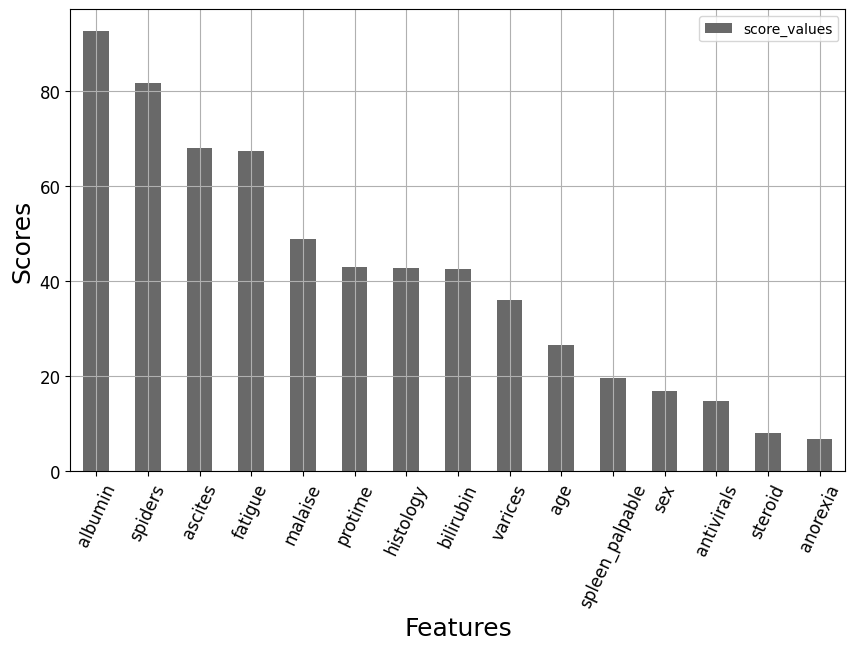

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=12)
plt.xticks(rotation = 65)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_train = X_train[list(best_15.index)]
X_train.shape

(162, 15)

In [ ]:
X_test = X_test[list(best_15.index)]
X_test.shape

(54, 15)

In [ ]:
X_val = X_val[list(best_15.index)]
X_val.shape

(16, 15)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=7)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=38)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.01)
{'var_smoothing': 0.01}
LogisticRegression(random_state=0)
SGDClassifier(random_state=15)
ExtraTreesClassifier(random_state=1)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# f_classif_SMOTETomek

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.87037
KNN,1.0,0.9375,0.907407
GNB,0.876543,1.0,0.87037
SGD,0.876543,0.8125,0.87037
LR,0.907407,0.9375,0.888889
SVM,0.932099,1.0,0.87037
DT,1.0,0.875,0.87037
XT,1.0,0.9375,0.888889
Stacking,1.0,1.0,0.888889


##Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape

(139, 19)

In [ ]:
# resample by adding samples to minority class using SMOTE
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

Class counts after resampling Counter({1.0: 109, 0.0: 107})


(216, 19)

In [ ]:
X = X_oversamp
y = Y_over_samp

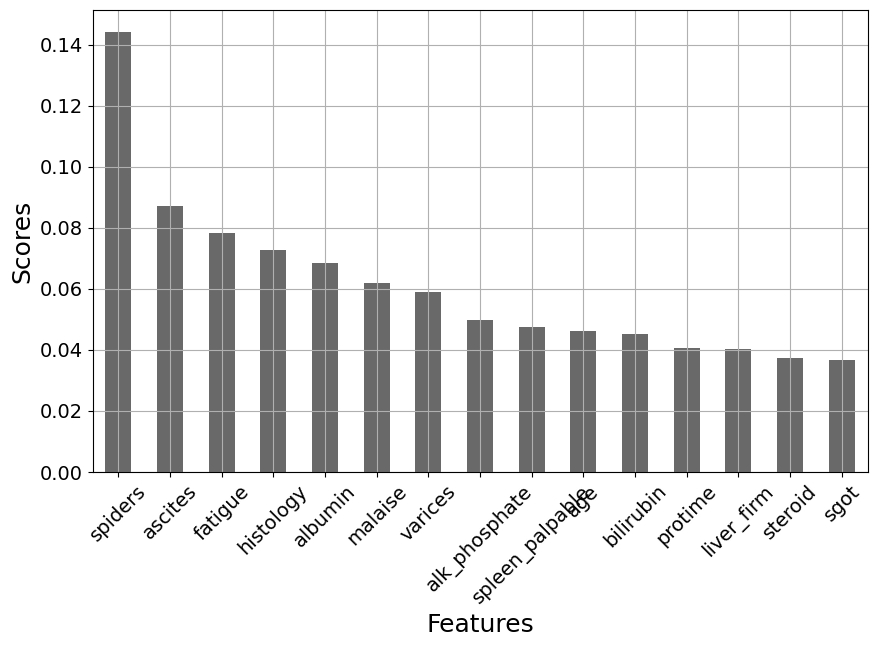

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X[list(importances.nlargest(15).index)]
X_Extra_tree.shape

(216, 15)

In [ ]:
X_val = X_val[list(importances.nlargest(15).index)]

In [ ]:
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, random_state=42, test_size=0.25)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=39)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=30)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0533669923120631)
{'var_smoothing': 0.0533669923120631}
LogisticRegression(random_state=0)
SGDClassifier(random_state=22)
ExtraTreesClassifier(random_state=31)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XT_SMOTETomek

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.87037
KNN,1.0,0.8125,0.925926
GNB,0.876543,0.9375,0.888889
SGD,0.876543,0.875,0.888889
LR,0.876543,0.9375,0.888889
SVM,0.950617,0.9375,0.907407
DT,1.0,0.9375,0.851852
XT,1.0,0.9375,0.907407
Stacking,1.0,0.9375,0.925926


##Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
# resample by adding samples to minority class using SMOTETomek
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

Class counts after resampling Counter({1.0: 109, 0.0: 107})


(216, 19)

In [ ]:
X = X_oversamp
y = Y_over_samp
X = X.astype(float) #Cause some are of object type, code doesn't work in xgb.DMatrix(X, y)

[13:58:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


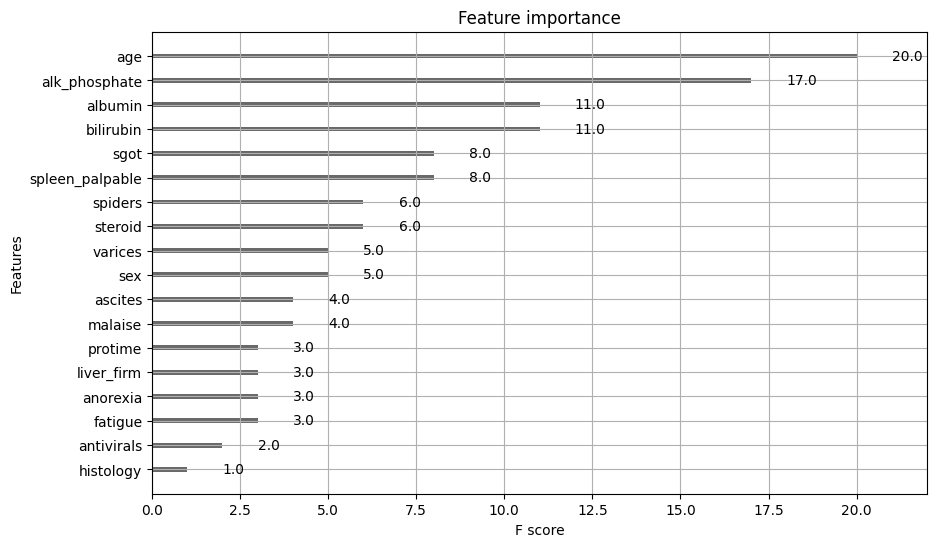

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X.shape

(216, 19)

In [ ]:
X_xgboost = X.loc[:, ['age', 'alk_phosphate', 'albumin', 'bilirubin', 'sgot', 'spleen_palpable', 'spiders', 'steroid', 'varices', 'sex', 'ascites', 'malaise', 'protime', 'liver_firm', 'anorexia']]
X_xgboost.shape

(216, 15)

In [ ]:
X_val = X_val.loc[:, ['age', 'alk_phosphate', 'albumin', 'bilirubin', 'sgot', 'spleen_palpable', 'spiders', 'steroid', 'varices', 'sex', 'ascites', 'malaise', 'protime', 'liver_firm', 'anorexia']]
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, random_state=42, test_size=0.25)

In [ ]:
X_train.shape

(162, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=31)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=6)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0533669923120631)
{'var_smoothing': 0.0533669923120631}
LogisticRegression(random_state=0)
SGDClassifier(random_state=11)
ExtraTreesClassifier(random_state=20)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XGB_SMOTETomek

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.87037
KNN,1.0,0.8125,0.907407
GNB,0.91358,0.9375,0.888889
SGD,0.925926,1.0,0.87037
LR,0.907407,0.875,0.907407
SVM,0.962963,0.9375,0.888889
DT,1.0,0.875,0.851852
XT,1.0,0.9375,0.907407
Stacking,1.0,0.9375,0.907407


##Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
# resample by adding samples to minority class using SMOTETomek
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

Class counts after resampling Counter({1.0: 109, 0.0: 107})


(216, 19)

In [ ]:
X = X_oversamp
y = Y_over_samp

Elapsed time to compute the importances: 0.017 seconds


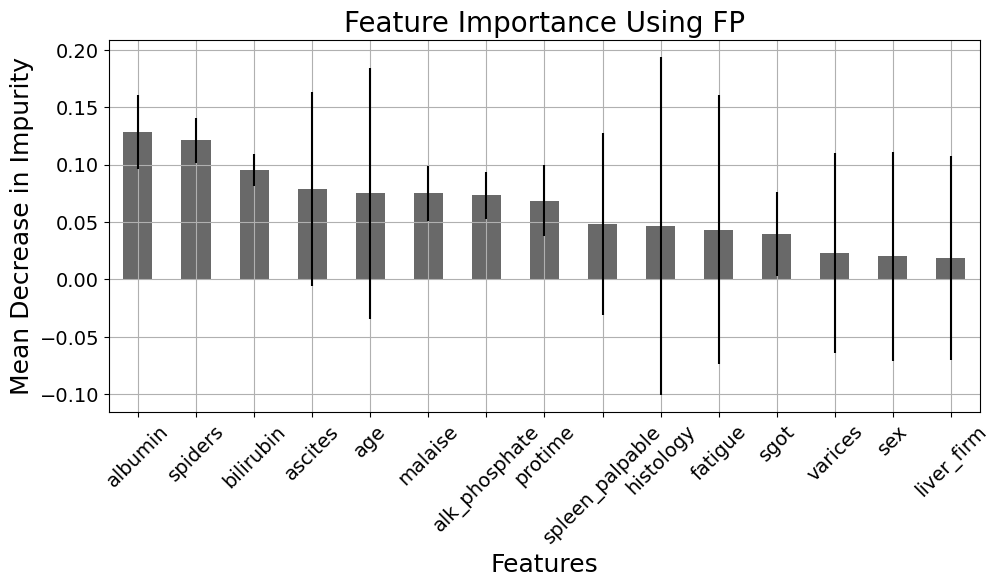

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using FP", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X_rf_mdi = X[best_15.features.values]
X_rf_mdi.shape

(216, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(162, 15)

In [ ]:
best_15.features.values

array(['albumin', 'spiders', 'bilirubin', 'ascites', 'age', 'malaise',
       'alk_phosphate', 'protime', 'spleen_palpable', 'histology',
       'fatigue', 'sgot', 'varices', 'sex', 'liver_firm'], dtype=object)

In [ ]:
X_val = X_val.loc[:, best_15.features.values]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=5)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=33)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.006579332246575682)
{'var_smoothing': 0.006579332246575682}
LogisticRegression(random_state=0)
SGDClassifier(random_state=3)
ExtraTreesClassifier(random_state=47)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# MDI_SMOTETomek

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.907407
KNN,1.0,0.75,0.925926
GNB,0.895062,0.9375,0.888889
SGD,0.907407,1.0,0.87037
LR,0.895062,0.9375,0.87037
SVM,0.962963,0.9375,0.888889
DT,1.0,0.8125,0.851852
XT,1.0,0.9375,0.925926
Stacking,1.0,0.9375,0.925926


##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
# resample by adding samples to minority class using SMOTETomek
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_oversamp, Y_over_samp = resample.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(Y_over_samp)}")
X_oversamp.shape

Class counts after resampling Counter({1.0: 109, 0.0: 107})


(216, 19)

In [ ]:
X = X_oversamp
y = Y_over_samp

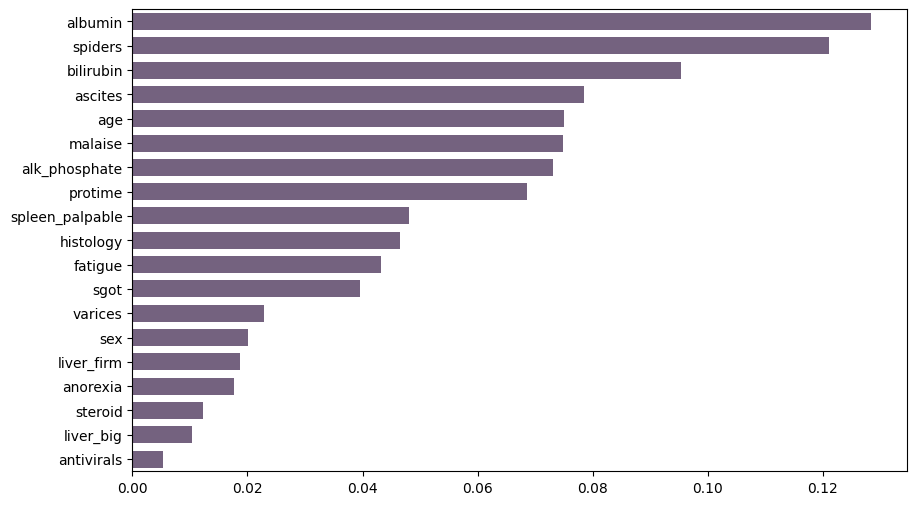

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X.shape

(216, 19)

In [ ]:
X_rf_permutation = X[['albumin','spiders','bilirubin','ascites','age','malaise','alk_phosphate','protime','spleen_palpable','histology','fatigue','sgot','varices','sex','liver_firm']]
X_rf_permutation.shape

(216, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(162, 15)

In [ ]:
X_val = X_val[['albumin','spiders','bilirubin','ascites','age','malaise','alk_phosphate','protime','spleen_palpable','histology','fatigue','sgot','varices','sex','liver_firm']]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
X_train.shape

(162, 15)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=5)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=33)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.006579332246575682)
{'var_smoothing': 0.006579332246575682}
LogisticRegression(random_state=0)
SGDClassifier(random_state=3)
ExtraTreesClassifier(random_state=47)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# FP_SMOTETomek

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.907407
KNN,1.0,0.75,0.925926
GNB,0.895062,0.9375,0.888889
SGD,0.907407,1.0,0.87037
LR,0.895062,0.9375,0.87037
SVM,0.962963,0.9375,0.888889
DT,1.0,0.8125,0.851852
XT,1.0,0.9375,0.925926
Stacking,1.0,0.9375,0.925926


###Data Balancing, SMOTEN

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(y_res)}")

Class counts after resampling Counter({1.0: 109, 0.0: 109})


ML Models

In [ ]:
X = X_res
y = y_res

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(163, 19)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=7)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=29)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.02848035868435802)
{'var_smoothing': 0.02848035868435802}
LogisticRegression(random_state=0)
SGDClassifier(random_state=7)
ExtraTreesClassifier(random_state=13)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# 19_features_SMOTEN

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.945455
KNN,0.932515,0.8125,0.872727
GNB,0.895706,0.875,0.909091
SGD,0.907975,0.8125,0.872727
LR,0.920245,0.875,0.890909
SVM,0.969325,0.9375,0.872727
DT,1.0,0.75,0.909091
XT,1.0,0.9375,0.909091
Stacking,0.98773,0.9375,0.927273


###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(y_res)}")

Class counts after resampling Counter({1.0: 109, 0.0: 109})


In [ ]:
X = X_res
y = y_res

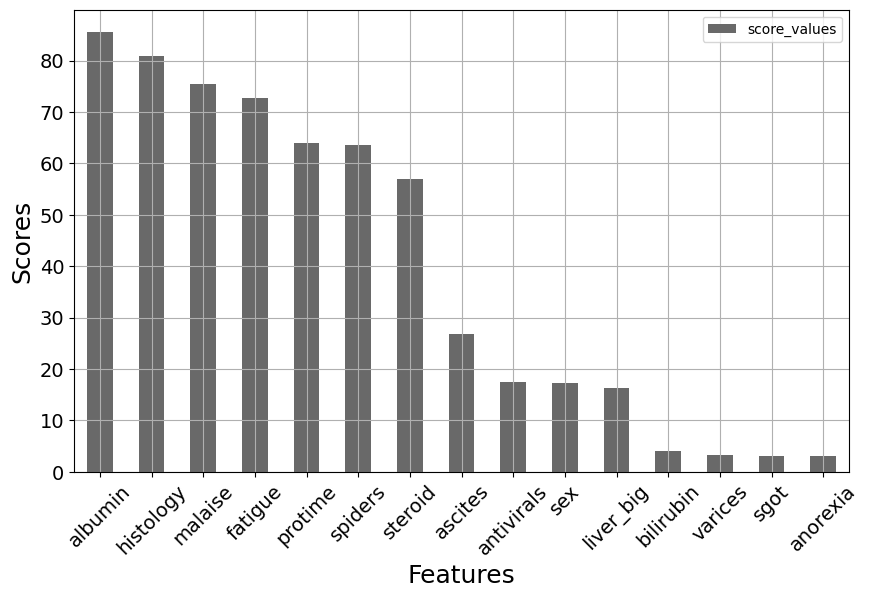

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_f_classif = X[list(best_15.index)]
X_f_classif.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f_classif, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val = X_val[list(best_15.index)]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=10)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=43)
SVC(kernel='linear', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.02848035868435802)
{'var_smoothing': 0.02848035868435802}
LogisticRegression(random_state=0)
SGDClassifier(random_state=37)
ExtraTreesClassifier(random_state=26)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# f_classif_SMOTEN

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.945455
KNN,1.0,0.875,0.909091
GNB,0.90184,0.9375,0.872727
SGD,0.90184,0.8125,0.890909
LR,0.907975,0.9375,0.890909
SVM,0.895706,0.9375,0.872727
DT,1.0,0.8125,0.909091
XT,1.0,0.9375,0.890909
Stacking,1.0,0.9375,0.945455


##Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(y_res)}")

Class counts after resampling Counter({1.0: 109, 0.0: 109})


In [ ]:
X = X_res
y = y_res

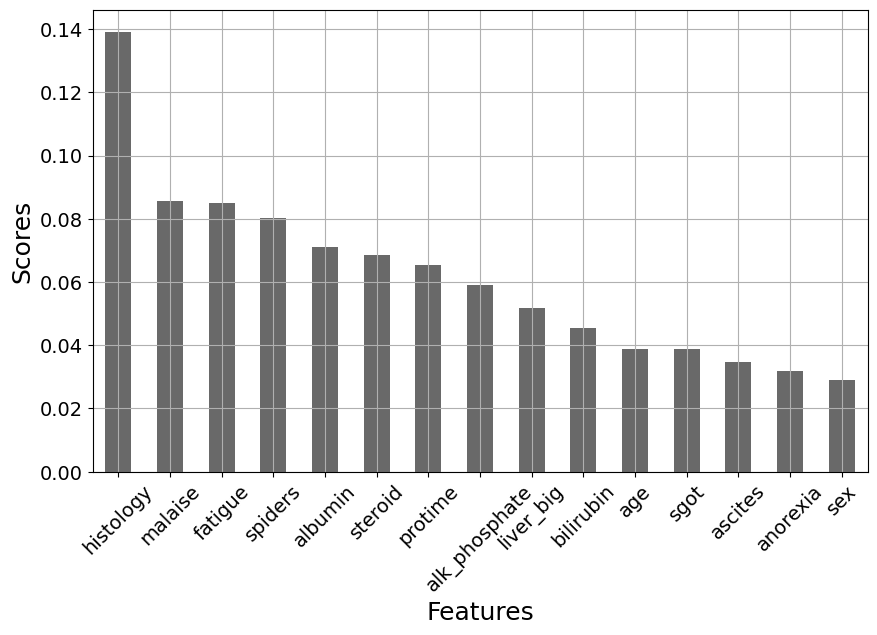

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X[list(importances.nlargest(15).index)]
X_Extra_tree.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val = X_val[list(importances.nlargest(15).index)]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=22)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=16)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}
LogisticRegression(random_state=0)
SGDClassifier(random_state=42)
ExtraTreesClassifier(random_state=13)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XT_SMOTEN

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.945455
KNN,0.91411,0.875,0.836364
GNB,0.883436,0.875,0.909091
SGD,0.90184,0.8125,0.890909
LR,0.90184,0.875,0.890909
SVM,0.95092,0.9375,0.909091
DT,1.0,0.75,0.909091
XT,1.0,0.875,0.909091
Stacking,0.98773,0.9375,0.927273


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(y_res)}")

Class counts after resampling Counter({1.0: 109, 0.0: 109})


In [ ]:
X = X_res
y = y_res

[04:36:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


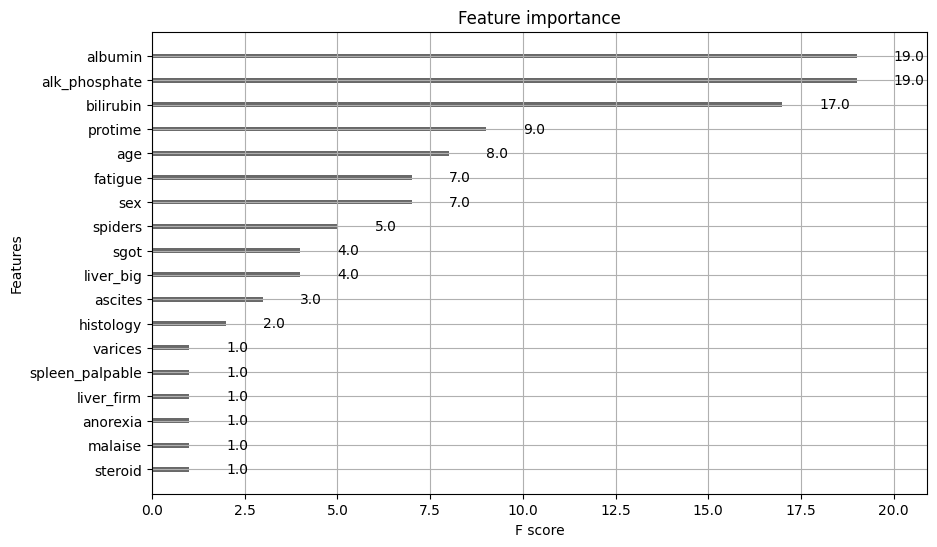

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work mentioned below.

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X.shape

(218, 19)

In [ ]:
X_xgboost = X[['albumin', 'alk_phosphate', 'bilirubin', 'protime', 'age', 'fatigue', 'sex', 'spiders', 'sgot', 'liver_big', 'ascites', 'histology', 'varices', 'spleen_palpable', 'liver_firm']]
X_xgboost.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val.shape

(16, 19)

In [ ]:
X_val = X_val[['albumin', 'alk_phosphate', 'bilirubin', 'protime', 'age', 'fatigue', 'sex', 'spiders', 'sgot', 'liver_big', 'ascites', 'histology', 'varices', 'spleen_palpable', 'liver_firm']]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=50)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=20)
SVC(kernel='linear', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.02310129700083159)
{'var_smoothing': 0.02310129700083159}
LogisticRegression(random_state=0)
SGDClassifier(random_state=14)
ExtraTreesClassifier(random_state=9)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XGB_SMOTEN

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.945455
KNN,0.91411,0.875,0.854545
GNB,0.895706,0.9375,0.945455
SGD,0.907975,0.8125,0.836364
LR,0.90184,0.8125,0.854545
SVM,0.90184,0.9375,0.854545
DT,1.0,0.75,0.909091
XT,1.0,0.875,0.927273
Stacking,1.0,0.875,0.927273


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 109, 0.0: 109})


Elapsed time to compute the importances: 0.010 seconds


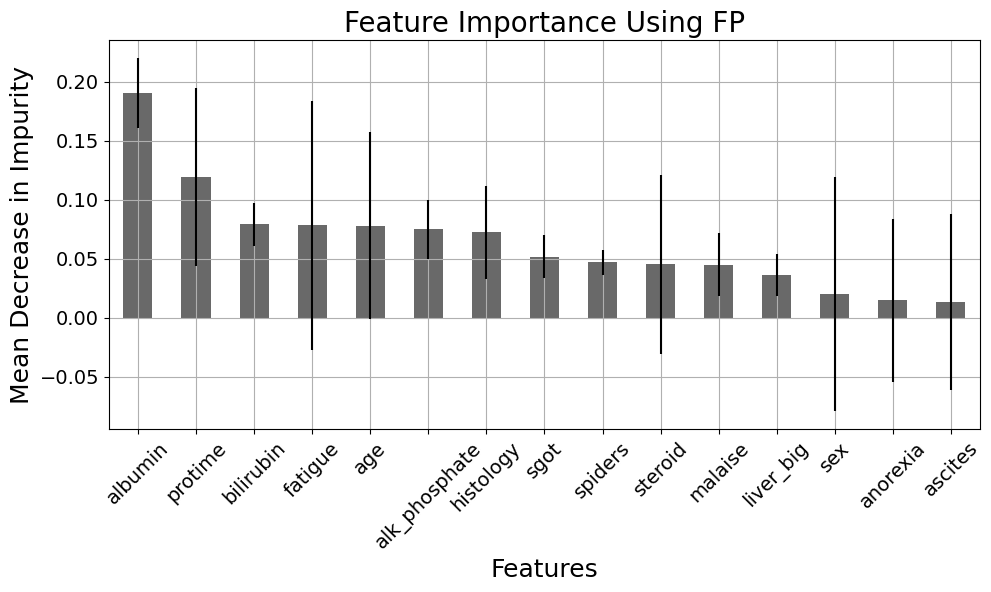

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using FP", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
forest_importances.index

Index(['albumin', 'protime', 'bilirubin', 'fatigue', 'age', 'alk_phosphate',
       'histology', 'sgot', 'spiders', 'steroid', 'malaise', 'liver_big',
       'sex', 'anorexia', 'ascites'],
      dtype='object')

In [ ]:
X_rf_mdi = X[forest_importances.index]
X_rf_mdi.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val = X_val[forest_importances.index]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=24)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=31)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}
LogisticRegression(random_state=0)
SGDClassifier(random_state=42)
ExtraTreesClassifier(random_state=5)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# MDI_SMOTEN

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.945455
KNN,0.91411,0.875,0.836364
GNB,0.883436,0.875,0.909091
SGD,0.90184,0.8125,0.890909
LR,0.90184,0.875,0.890909
SVM,0.95092,0.9375,0.909091
DT,1.0,0.75,0.890909
XT,1.0,0.9375,0.927273
Stacking,0.98773,0.9375,0.927273


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X_train, y_train)
print(f"Class counts after resampling {Counter(y_res)}")

X = X_res
y = y_res

Class counts after resampling Counter({1.0: 109, 0.0: 109})


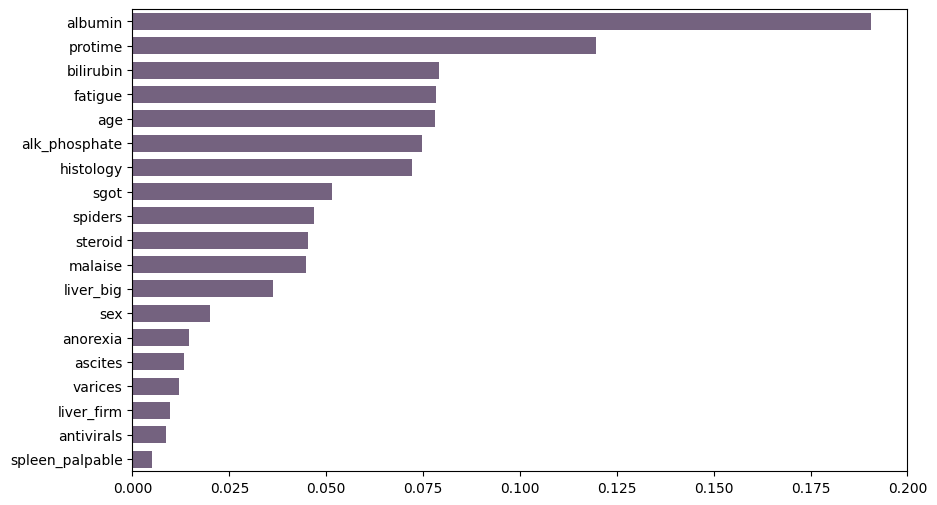

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X.shape

(218, 19)

In [ ]:
X_rf_permutation = X[['albumin', 'protime', 'bilirubin', 'fatigue', 'age', 'alk_phosphate', 'histology', 'sgot', 'spiders', 'steroid', 'malaise', 'liver_big', 'sex', 'anorexia', 'ascites']]
X_rf_permutation.shape

(218, 15)

In [ ]:
X_val.shape

(16, 19)

In [ ]:
X_val = X_val[['albumin', 'protime', 'bilirubin', 'fatigue', 'age', 'alk_phosphate', 'histology', 'sgot', 'spiders', 'steroid', 'malaise', 'liver_big', 'sex', 'anorexia', 'ascites']]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=24)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=31)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}
LogisticRegression(random_state=0)
SGDClassifier(random_state=42)
ExtraTreesClassifier(random_state=5)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# FP_SMOTEN

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.945455
KNN,0.91411,0.875,0.836364
GNB,0.883436,0.875,0.909091
SGD,0.90184,0.8125,0.890909
LR,0.90184,0.875,0.890909
SVM,0.95092,0.9375,0.909091
DT,1.0,0.75,0.890909
XT,1.0,0.9375,0.927273
Stacking,0.98773,0.9375,0.927273


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Data Balancing, NearMiss

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 30, 1.0: 30})


ML Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(45, 19)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=30)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=19)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=6.579332246575682e-07)
{'var_smoothing': 6.579332246575682e-07}
LogisticRegression(random_state=0)
SGDClassifier(random_state=12)
ExtraTreesClassifier(random_state=10)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# 19_features_NearMiss

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.8
KNN,0.8,1.0,0.933333
GNB,0.844444,0.6875,0.733333
SGD,0.888889,0.9375,0.666667
LR,0.933333,0.875,0.866667
SVM,0.933333,0.875,0.866667
DT,1.0,0.625,0.733333
XT,1.0,0.8125,0.8
Stacking,0.955556,0.875,0.8


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 30, 1.0: 30})


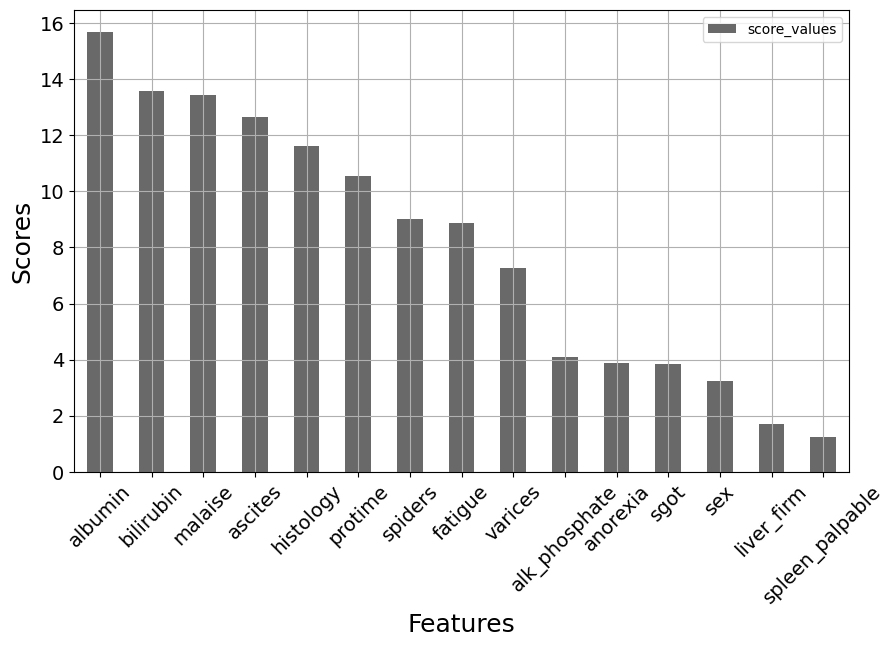

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_f_classif = X[list(best_15.index)]
X_f_classif.shape

(60, 15)

In [ ]:
X_val = X_val[list(best_15.index)]
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f_classif, y, test_size=0.25, random_state=42)
X_train.shape

(45, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=3)
KNeighborsClassifier(n_neighbors=8)
DecisionTreeClassifier(random_state=18)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.08111308307896872)
{'var_smoothing': 0.08111308307896872}
LogisticRegression(random_state=0)
SGDClassifier(random_state=30)
ExtraTreesClassifier(random_state=13)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# f_classif_NearMiss

,train_acc,test_acc,val_acc
RF,1.0,0.875,0.866667
KNN,0.777778,0.9375,0.866667
GNB,0.888889,0.875,0.866667
SGD,0.866667,0.875,0.666667
LR,0.866667,0.9375,0.866667
SVM,0.911111,0.875,0.866667
DT,1.0,0.625,0.733333
XT,1.0,0.875,0.733333
Stacking,0.933333,0.875,0.866667


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 30, 1.0: 30})


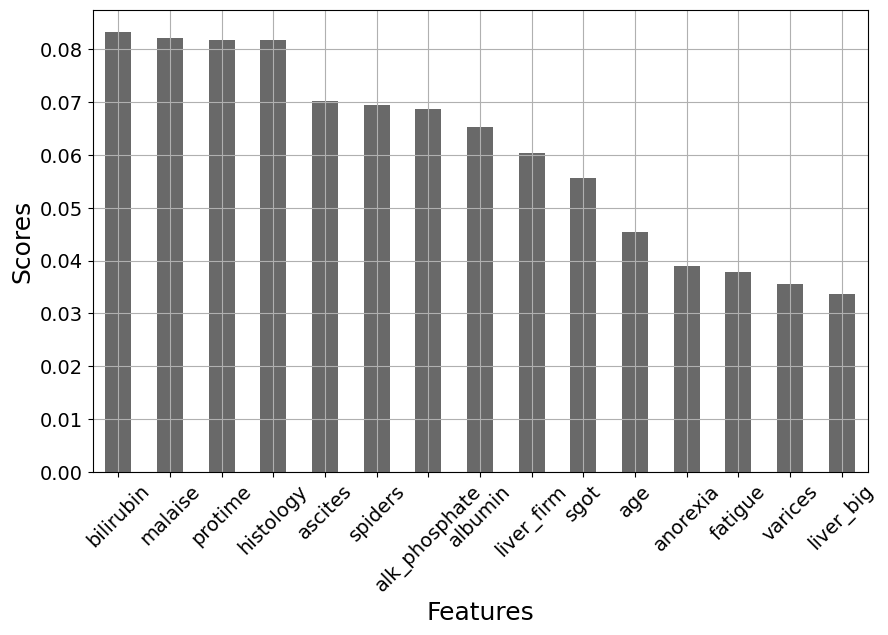

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X[list(importances.nlargest(15).index)]
X_Extra_tree.shape

(60, 15)

In [ ]:
X_val = X_val[list(importances.nlargest(15).index)]
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, test_size=0.25, random_state=42)
X_train.shape

(45, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=2)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=3)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0657933224657568)
{'var_smoothing': 0.0657933224657568}
LogisticRegression(random_state=0)
SGDClassifier(random_state=46)
ExtraTreesClassifier(random_state=46)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XT_NearMiss

,train_acc,test_acc,val_acc
RF,1.0,0.8125,0.8
KNN,1.0,0.6875,0.866667
GNB,0.888889,0.875,0.866667
SGD,0.866667,0.75,0.866667
LR,0.911111,0.875,0.866667
SVM,0.888889,0.875,0.866667
DT,1.0,0.75,0.733333
XT,1.0,0.8125,0.8
Stacking,0.955556,0.875,0.866667


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 30, 1.0: 30})


[02:42:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


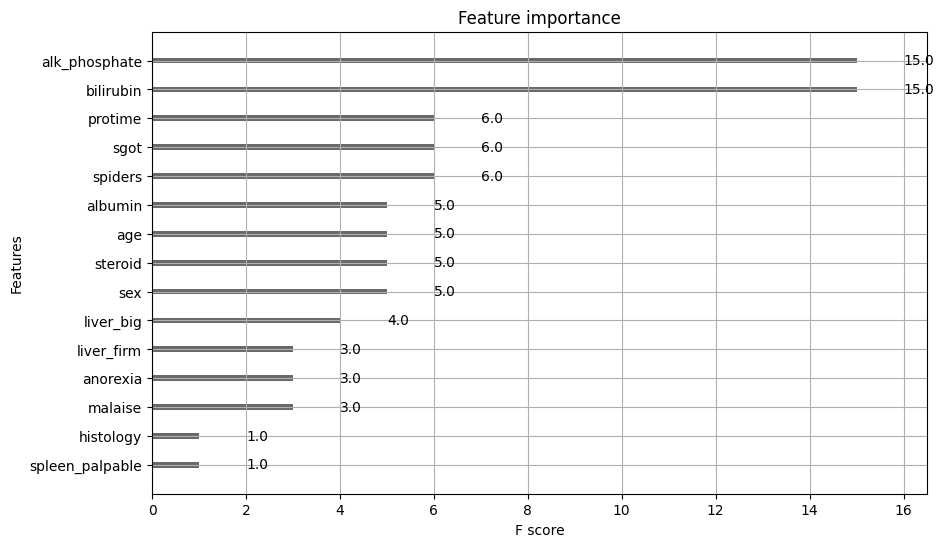

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work mentioned below.
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X_xgboost = X[['alk_phosphate', 'bilirubin', 'protime', 'sgot', 'spiders', 'albumin', 'albumin', 'age', 'steroid', 'sex', 'liver_big', 'liver_firm', 'anorexia', 'malaise', 'histology']]
X_xgboost.shape

(60, 15)

In [ ]:
X_val = X_val[['alk_phosphate', 'bilirubin', 'protime', 'sgot', 'spiders', 'albumin', 'albumin', 'age', 'steroid', 'sex', 'liver_big', 'liver_firm', 'anorexia', 'malaise', 'histology']]
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, test_size=0.25, random_state=42)
X_train.shape

(45, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=15)
KNeighborsClassifier(n_neighbors=8)
DecisionTreeClassifier(random_state=2)
SVC(kernel='linear', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.23101297000831597)
{'var_smoothing': 0.23101297000831597}
LogisticRegression(random_state=0)
SGDClassifier(random_state=46)
ExtraTreesClassifier(random_state=31)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XGB_NearMiss

,train_acc,test_acc,val_acc
RF,1.0,0.8125,0.8
KNN,0.822222,0.9375,0.866667
GNB,0.844444,0.9375,0.733333
SGD,0.933333,0.875,0.8
LR,0.933333,0.875,0.866667
SVM,0.933333,0.875,0.866667
DT,1.0,0.6875,0.8
XT,1.0,0.8125,0.733333
Stacking,0.977778,0.9375,0.866667


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 30, 1.0: 30})


Elapsed time to compute the importances: 0.042 seconds


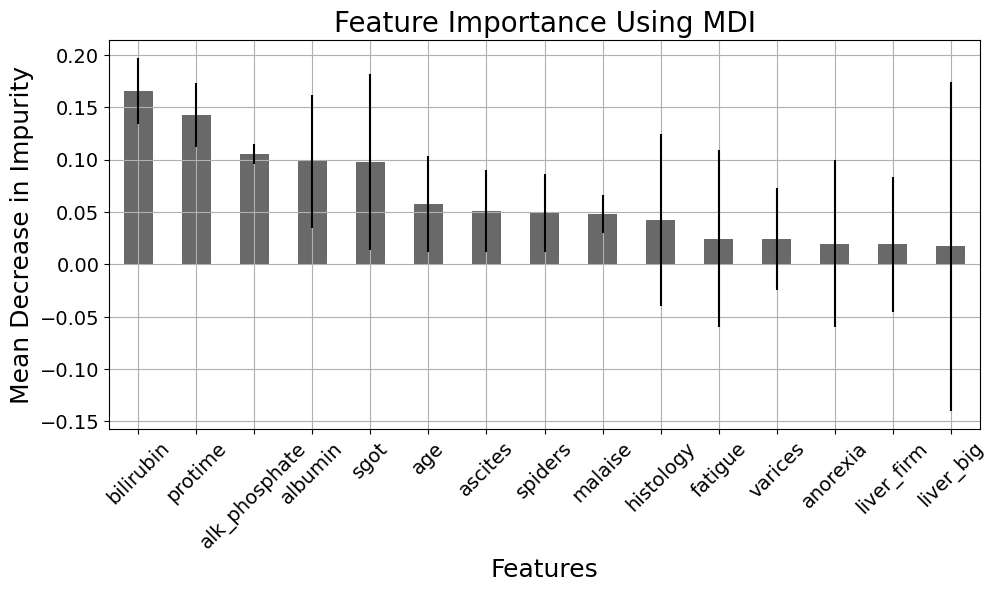

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using MDI", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X_rf_mdi = X[feature_names]
X_rf_mdi.shape

(60, 15)

In [ ]:
X_val = X_val[feature_names]
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(45, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=35)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=29)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0657933224657568)
{'var_smoothing': 0.0657933224657568}
LogisticRegression(random_state=0)
SGDClassifier(random_state=46)
ExtraTreesClassifier(random_state=13)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# MDI_NearMiss

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.866667
KNN,1.0,0.6875,0.866667
GNB,0.888889,0.875,0.866667
SGD,0.866667,0.75,0.866667
LR,0.911111,0.875,0.866667
SVM,0.888889,0.875,0.866667
DT,1.0,0.5625,0.733333
XT,1.0,0.8125,0.8
Stacking,0.955556,0.9375,0.866667


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
print('Original dataset shape %s' % Counter(final_df_1['class']))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X = X_res
y = y_res

Original dataset shape Counter({1.0: 123, 0.0: 32})
Resampled dataset shape Counter({0.0: 30, 1.0: 30})


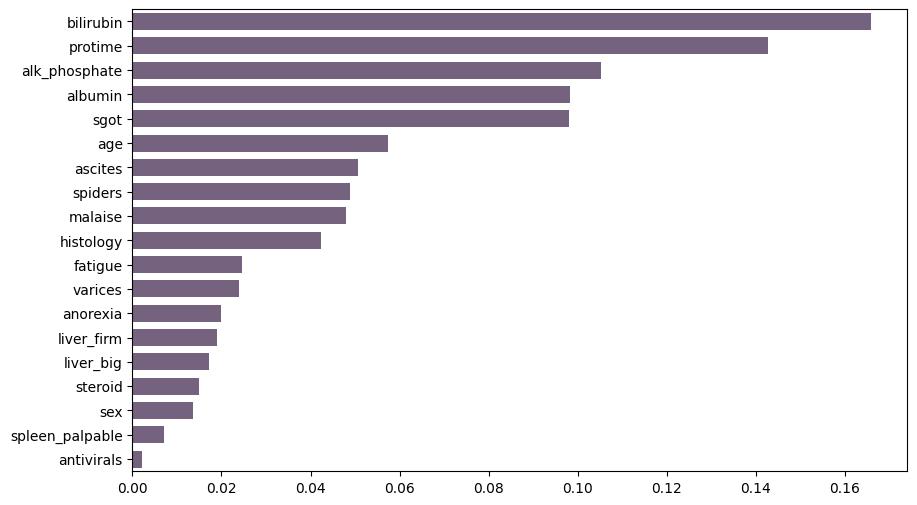

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X_rf_permutation = X[['bilirubin', 'protime', 'alk_phosphate', 'albumin', 'sgot', 'age', 'ascites', 'spiders', 'malaise', 'histology', 'fatigue', 'varices', 'anorexia', 'liver_firm', 'liver_big']]
X_rf_permutation.shape

(60, 15)

In [ ]:
X_val = X_val[['bilirubin', 'protime', 'alk_phosphate', 'albumin', 'sgot', 'age', 'ascites', 'spiders', 'malaise', 'histology', 'fatigue', 'varices', 'anorexia', 'liver_firm', 'liver_big']]
X_val.shape

(16, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(45, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=35)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=29)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0657933224657568)
{'var_smoothing': 0.0657933224657568}
LogisticRegression(random_state=0)
SGDClassifier(random_state=46)
ExtraTreesClassifier(random_state=13)


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# FP_NearMiss

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.866667
KNN,1.0,0.6875,0.866667
GNB,0.888889,0.875,0.866667
SGD,0.866667,0.75,0.866667
LR,0.911111,0.875,0.866667
SVM,0.888889,0.875,0.866667
DT,1.0,0.5625,0.733333
XT,1.0,0.8125,0.8
Stacking,0.955556,0.9375,0.866667


###Data Balancing, SMOTE

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

Counter({1.0: 109, 0.0: 109})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.25, random_state=42)
X_train.shape

(163, 19)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=8)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=26)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0657933224657568)
{'var_smoothing': 0.0657933224657568}
LogisticRegression(random_state=0)
SGDClassifier(random_state=33)
ExtraTreesClassifier(random_state=2)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# 19_features_SMOTE

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.890909
KNN,0.932515,0.75,0.909091
GNB,0.883436,0.9375,0.818182
SGD,0.883436,0.75,0.781818
LR,0.895706,0.9375,0.8
SVM,0.957055,0.9375,0.909091
DT,1.0,0.8125,0.8
XT,1.0,0.9375,0.927273
Stacking,1.0,0.9375,0.909091


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection, SelectKBest(score_func = f_classif)

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 109, 0.0: 109})


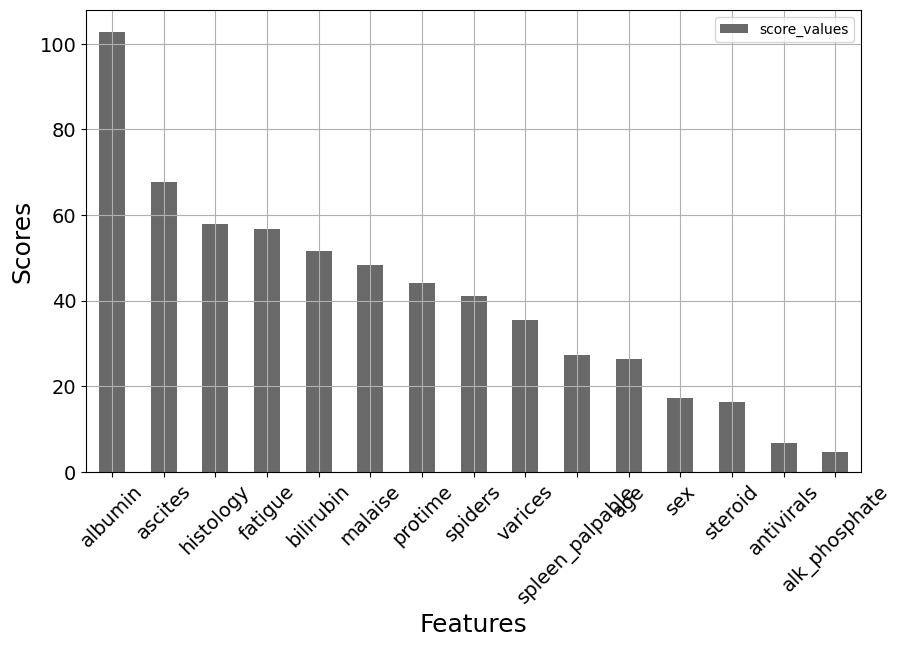

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X = X[best_15.index]
X.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val = X_val[best_15.index]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=42)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=43)
SVC(probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0657933224657568)
{'var_smoothing': 0.0657933224657568}
LogisticRegression(random_state=0)
SGDClassifier(random_state=28)
ExtraTreesClassifier(random_state=23)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# f_classif_SMOTE

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.927273
KNN,1.0,0.9375,0.945455
GNB,0.852761,0.9375,0.909091
SGD,0.871166,0.8125,0.854545
LR,0.858896,0.9375,0.945455
SVM,0.944785,0.9375,0.927273
DT,1.0,0.75,0.890909
XT,1.0,0.9375,0.945455
Stacking,1.0,0.9375,0.945455


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Selection Using ExtraTrees

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 123, 0.0: 32})


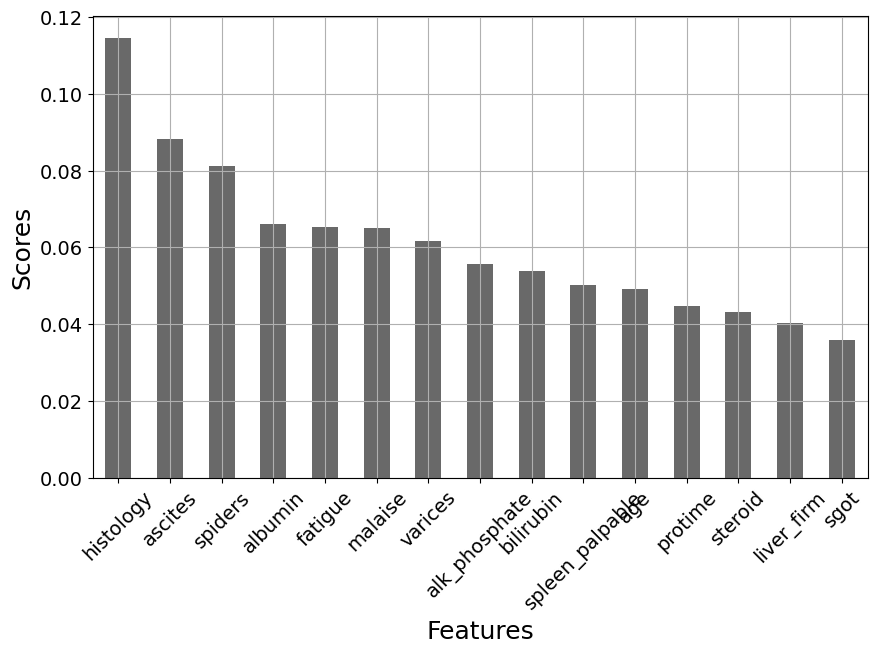

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_tree = X[importances.nlargest(15).index]
X_tree.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val = X_val[importances.nlargest(15).index]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=25)
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(random_state=22)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.43287612810830584)
{'var_smoothing': 0.43287612810830584}
LogisticRegression(random_state=0)
SGDClassifier(random_state=36)
ExtraTreesClassifier(random_state=41)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XT_SMOTE

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.909091
KNN,0.91411,0.875,0.854545
GNB,0.846626,1.0,0.836364
SGD,0.840491,0.75,0.8
LR,0.840491,0.9375,0.818182
SVM,0.932515,0.9375,0.836364
DT,1.0,0.8125,0.854545
XT,1.0,0.9375,0.945455
Stacking,1.0,0.9375,0.872727


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Importance Using xgboost

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 109, 0.0: 109})


[04:49:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


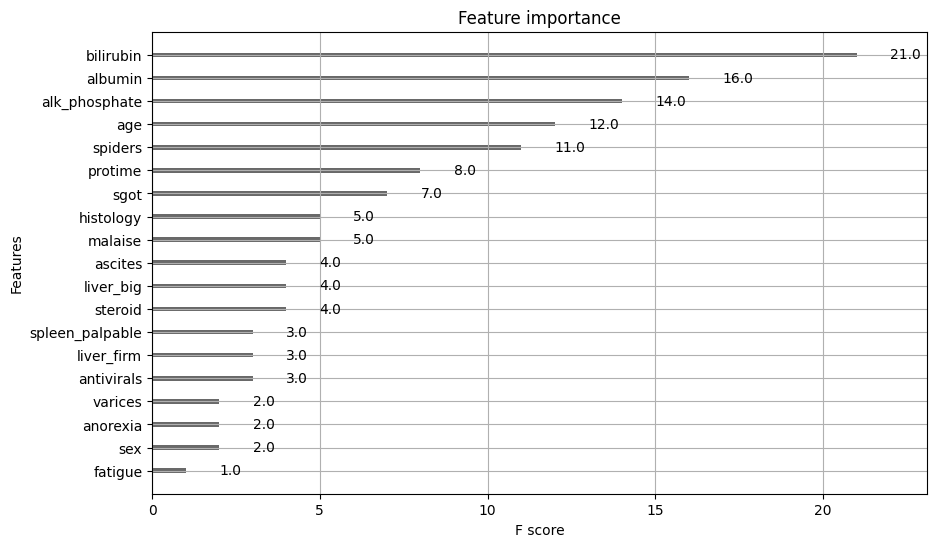

In [ ]:
X = X.astype(float) #Cause some are of object type, code doesn't work mentioned below.
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
xgboost = X[['bilirubin', 'albumin', 'alk_phosphate', 'age', 'spiders', 'protime', 'sgot', 'histology', 'malaise', 'ascites', 'liver_big', 'steroid', 'spleen_palpable', 'liver_firm', 'antivirals']]
xgboost.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xgboost, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val.shape

(16, 19)

In [ ]:
X_val = X_val[['bilirubin', 'albumin', 'alk_phosphate', 'age', 'spiders', 'protime', 'sgot', 'histology', 'malaise', 'ascites', 'liver_big', 'steroid', 'spleen_palpable', 'liver_firm', 'antivirals']]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=46)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=19)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.8111308307896871)
{'var_smoothing': 0.8111308307896871}
LogisticRegression(random_state=0)
SGDClassifier(random_state=10)
ExtraTreesClassifier(random_state=3)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# XGB_SMOTE

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.890909
KNN,1.0,0.875,0.927273
GNB,0.846626,1.0,0.836364
SGD,0.858896,0.9375,0.836364
LR,0.871166,0.9375,0.872727
SVM,0.907975,0.9375,0.836364
DT,1.0,0.875,0.854545
XT,1.0,0.9375,0.963636
Stacking,1.0,0.9375,0.927273


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Importance Using RF, Based on MDI

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 109, 0.0: 109})


Elapsed time to compute the importances: 0.010 seconds


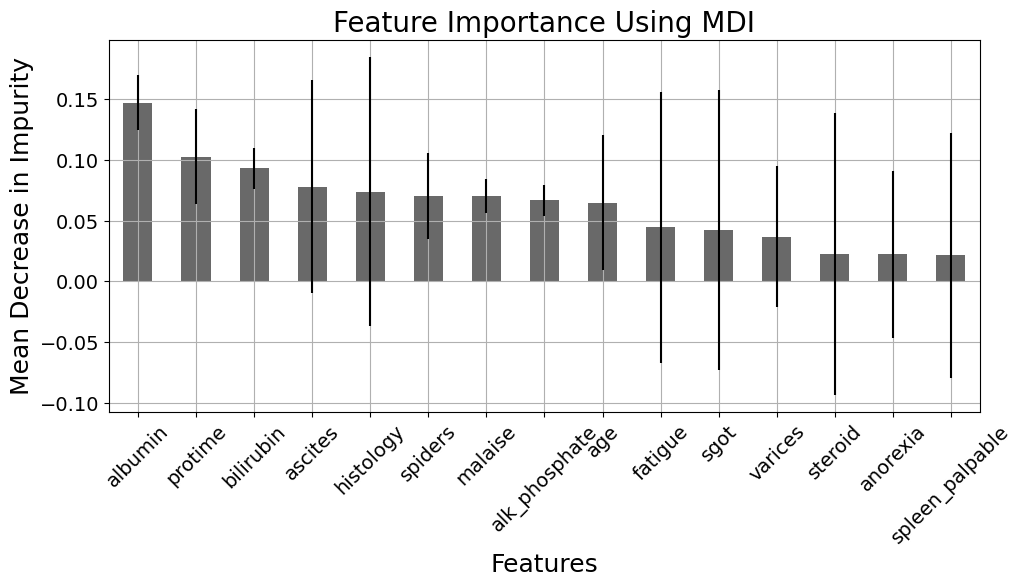

In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importance Using MDI", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X.shape

(218, 19)

In [ ]:
X_rf_mdi = X[forest_importances.index]
X_rf_mdi.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val = X_val[forest_importances.index]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=23)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=36)
SVC(kernel='poly', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=1.0)
{'var_smoothing': 1.0}
LogisticRegression(random_state=0)
SGDClassifier(random_state=17)
ExtraTreesClassifier(random_state=24)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# MDI_SMOTE

,train_acc,test_acc,val_acc
RF,1.0,0.9375,0.909091
KNN,1.0,0.875,0.945455
GNB,0.858896,0.9375,0.890909
SGD,0.871166,0.8125,0.818182
LR,0.858896,0.9375,0.854545
SVM,0.944785,0.9375,0.890909
DT,1.0,0.875,0.854545
XT,1.0,0.9375,0.909091
Stacking,1.0,0.9375,0.927273


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))

###Feature Importance Using RF, Based on FP

In [ ]:
X = final_df_1.drop('class', axis=1)
y = final_df_1['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(139, 19)

In [ ]:
#transform the dataset
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_oversample)
print(counter)

X = X_oversample
y = y_oversample

Counter({1.0: 109, 0.0: 109})


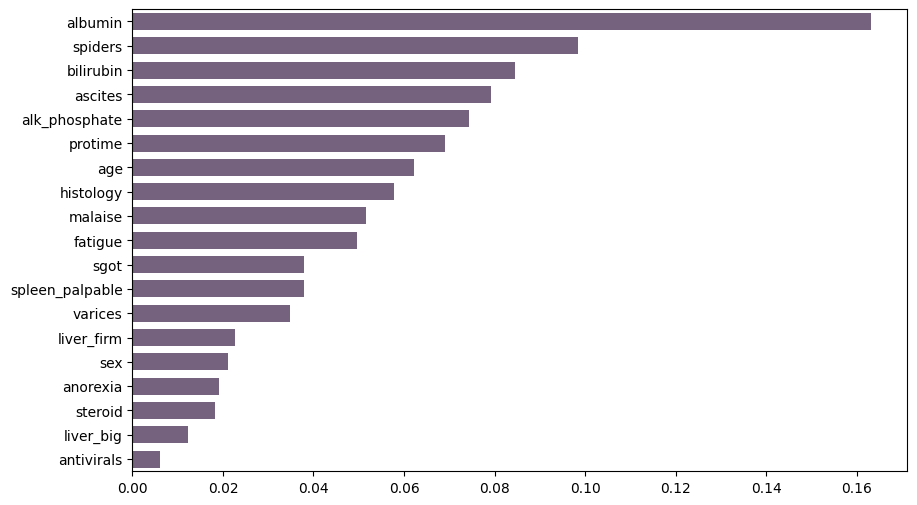

In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X_rf_permutation = X[['albumin', 'spiders', 'bilirubin', 'ascites', 'alk_phosphate', 'protime', 'age', 'histology', 'malaise', 'fatigue', 'sgot', 'spleen_palpable', 'varices', 'liver_firm', 'sex']]
X_rf_permutation.shape

(218, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.25, random_state=42)
X_train.shape

(163, 15)

In [ ]:
X_val.shape

(16, 19)

In [ ]:
X_val = X_val[['albumin', 'spiders', 'bilirubin', 'ascites', 'alk_phosphate', 'protime', 'age', 'histology', 'malaise', 'fatigue', 'sgot', 'spleen_palpable', 'varices', 'liver_firm', 'sex']]
X_val.shape

(16, 15)

In [ ]:
df_models_acc = pd.DataFrame(columns=['train_acc', 'val_acc', 'test_acc'], index=['RF','KNN', 'GNB', 'SGD', 'LR', 'SVM', 'DT', 'XT', 'Stacking'])

In [ ]:
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 51))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
train_acc = CV_rf.score(X_train, y_train)
val_acc = CV_rf.score(X_val, y_val)
test_acc = CV_rf.score(X_test, y_test)
df_models_acc.loc['RF'] = [train_acc, val_acc, test_acc]

#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
train_acc = CV_neigh.score(X_train, y_train)
val_acc = CV_neigh.score(X_val, y_val)
test_acc = CV_neigh.score(X_test, y_test)
df_models_acc.loc['KNN'] = [train_acc, val_acc, test_acc]

#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
train_acc = CV_dcsn_tree.score(X_train, y_train)
val_acc = CV_dcsn_tree.score(X_val, y_val)
test_acc = CV_dcsn_tree.score(X_test, y_test)
df_models_acc.loc['DT'] = [train_acc, val_acc, test_acc]

#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
train_acc = CV_svm.score(X_train, y_train)
val_acc = CV_svm.score(X_val, y_val)
test_acc = CV_svm.score(X_test, y_test)
df_models_acc.loc['SVM'] = [train_acc, val_acc, test_acc]

#GNB
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.best_params_)
train_acc = gs_NB.score(X_train, y_train)
val_acc = gs_NB.score(X_val, y_val)
test_acc = gs_NB.score(X_test, y_test)
df_models_acc.loc['GNB'] = [train_acc, val_acc, test_acc]


#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
train_acc = CV_lr.score(X_train, y_train)
val_acc = CV_lr.score(X_val, y_val)
test_acc = CV_lr.score(X_test, y_test)
df_models_acc.loc['LR'] = [train_acc, val_acc, test_acc]

#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
train_acc = CV_sgd.score(X_train, y_train)
val_acc = CV_sgd.score(X_val, y_val)
test_acc = CV_sgd.score(X_test, y_test)
df_models_acc.loc['SGD'] = [train_acc, val_acc, test_acc]

#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
train_acc = CV_X_tree.score(X_train, y_train)
val_acc =CV_X_tree.score(X_val, y_val)
test_acc = CV_X_tree.score(X_test, y_test)
df_models_acc.loc['XT'] = [train_acc, val_acc, test_acc]

estimators = [
    ('rf', CV_rf.best_estimator_),
    ('neigh', CV_neigh.best_estimator_),
    ('gnb', gs_NB.best_estimator_),
    ('sgd', CV_sgd.best_estimator_),
    ('lr', CV_lr.best_estimator_),
    ('svm', CV_svm.best_estimator_),
    ('dt', CV_dcsn_tree.best_estimator_),
    ('ExtraTrees', CV_X_tree.best_estimator_)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_acc = clf.fit(X_train, y_train).score(X_train, y_train)
val_acc = clf.score(X_val, y_val)
test_acc = clf.score(X_test, y_test)
estimator = clf
df_models_acc.loc['Stacking'] = [train_acc, val_acc, test_acc]

RandomForestClassifier(random_state=27)
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(random_state=5)
SVC(kernel='linear', probability=True, random_state=0)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.0015199110829529332)
{'var_smoothing': 0.0015199110829529332}
LogisticRegression(random_state=0)
SGDClassifier(random_state=17)
ExtraTreesClassifier(random_state=1)


In [ ]:
df_models_acc.columns =['train_acc', 'test_acc', 'val_acc'] # This is the right form not ['train_acc', 'test_acc', 'val_acc']
df_models_acc
# FP_SMOTE

,train_acc,test_acc,val_acc
RF,1.0,1.0,0.909091
KNN,1.0,0.8125,0.945455
GNB,0.858896,0.9375,0.854545
SGD,0.871166,0.875,0.854545
LR,0.858896,0.875,0.836364
SVM,0.858896,0.9375,0.836364
DT,1.0,0.75,0.781818
XT,1.0,0.9375,0.927273
Stacking,1.0,0.9375,0.945455


In [ ]:
# #classification Reports
# print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
# print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
# print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
# print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
# print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
# print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
# print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
# print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))
# print("Stacking",'\n',classification_report(y_test, clf.predict(X_test)))